### Algoritmo de Deustch-Jozsa

O objetivo é descobrir se uma dada função é constante ou balanceada. A vantagem, e o que o faz ser estudado, é que enquanto um algoritmo clássico precisaria executar N vezes para testar N entradas, o algoritmo quântico executa apenas uma vez e por conta do entrelaçamento consegue executar todas as entradas em paralelo. O algoritmo de Deutsch é a versão simplificada, enquanto Deustch-Jorza é a versão generalizada do algoritmo (algoritmo para N qubits).

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

# Algoritmo de Deustch

In [2]:
def deutsch_function(case: int):
    if case not in [1,2,3,4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")
    f = QuantumCircuit(2)
    if case in [2,3]:
        f.cx(0, 1)
    if case in [3,4]:
        f.x(1)
    return f

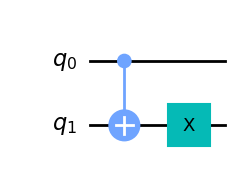

In [3]:
deutsch_function(3).draw(output='mpl')

In [4]:
def compile_circuit(function: QuantumCircuit):
    n = function.num_qubits-1
    qc = QuantumCircuit(n+1, n)

    qc.x(n)
    qc.h(range(n+1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

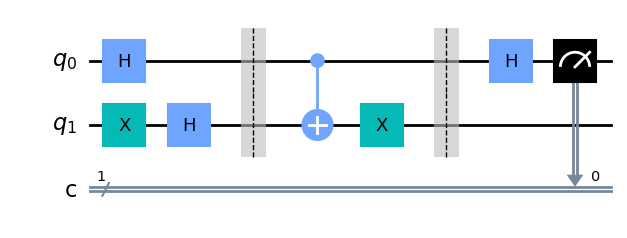

In [5]:
compile_circuit(deutsch_function(3)).draw(output='mpl')

In [6]:
def deutsch_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch function is constant or balanced.
    """
    qc = compile_circuit(function)
    
    result = AerSimulator().run(qc,shots=1,memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == '0':
        return "constant"
    return "balanced"

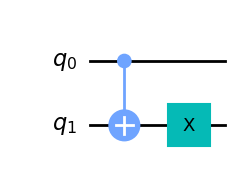

'balanced'

In [7]:
f = deutsch_function(3)
display(f.draw(output='mpl'))
deutsch_algorithm(f)

# Algoritmo de Deustch-Jorza

In [8]:
def dj_function(num_qubits):
    qc = QuantumCircuit(num_qubits+1)
    if np.random.randint(0, 2):
        # Flip output qubit with 50% chance
        qc.x(num_qubits)
    if np.random.randint(0, 2):
        # return constant circuit with 50% chance
        return qc
    
    # next, choose half the possible input states
    on_states = np.random.choice(
        range(2**num_qubits),  # numbers to sample from
        2**num_qubits // 2,    # number of samples
        replace=False  # makes sure states are only sampled once
    )

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == '1':
                qc.x(qubit)
        return qc

    for state in on_states:
        qc.barrier() # Barriers are added to help visualize how the functions are created. They can safely be removed.
        qc = add_cx(qc, f"{state:0b}")
        qc.mct(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")

    qc.barrier()
    
    return qc

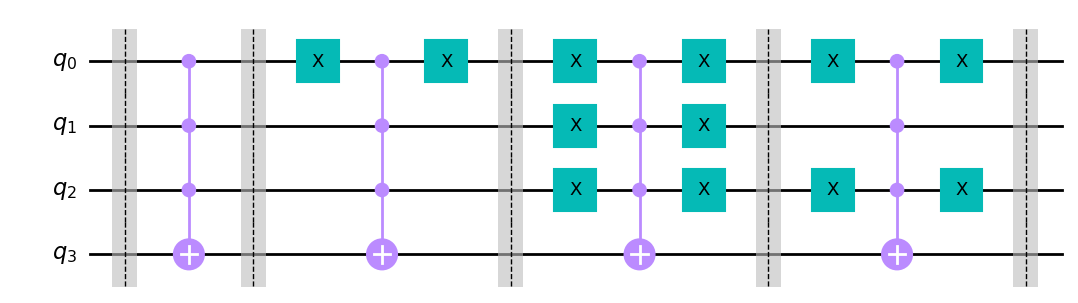

In [18]:
dj_function(3).draw(output='mpl')

In [19]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa algorithm.
    """
    n = function.num_qubits-1
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    qc.h(range(n+1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [20]:
def dj_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch-Jozsa function is constant or balanced.
    """
    qc = compile_circuit(function)
    
    result = AerSimulator().run(qc,shots=1,memory=True).result()
    measurements = result.get_memory()
    if '1' in measurements[0]:
        return 'balanced'
    return 'constant'

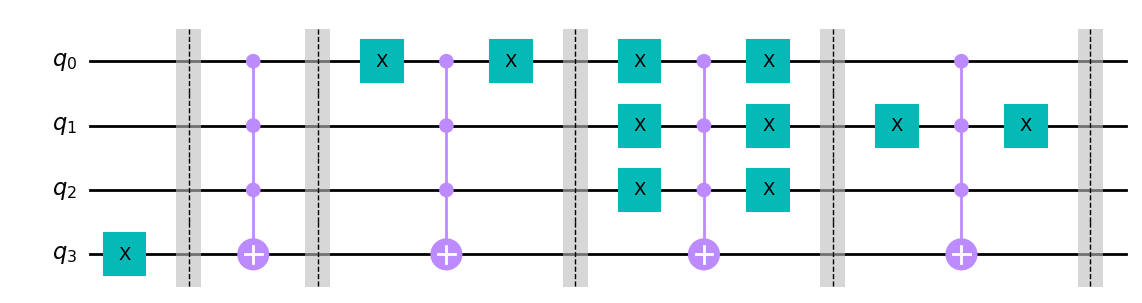

'balanced'

In [24]:
f = dj_function(3)
display(f.draw(output='mpl'))
dj_algorithm(f)